<font size = "6"> Fordham Sports Analytics Society Big Data Bowl 2023 - Data Visualizations </font>

<font size = "4"> Build regression model to determine the distance of an individual rusher at the end of QB "Possession". </font>

- Authors:  Peter Majors, Chris Orlando, Jack Townsend, and Etienne Busnel
- Kaggle:  https://www.kaggle.com/competitions/nfl-big-data-bowl-2023/overview (Resources)
- Our Github:  https://github.com/peterlmajors/FSAS_BigDataBowl_2023 (Up-To-Date Code)

In [2]:
#Import Required Packages

#Data Manipulation
import pandas as pd
import numpy as np
import math

#Data Vizualization
import seaborn as sns 
from matplotlib import pyplot as plt
import plotly.graph_objects as go

#Notebook Settings
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [3]:
#Import Data

#All Player Tracking
ptrack = pd.read_csv("C:/Users/Peter/Python Scripts/Case Competitions/NFL Big Data Bowl 2023/merged_data/ptrack.csv")

#Player Tracking Only On Frames When QB The Target For Pass Rushers, The Pass Rusher Is Known, The Pass Rusher Is In The Immediate Zone, and A Block Occurs
ptrack_qb_poss_block = pd.read_csv("C:/Users/Peter/Python Scripts/Case Competitions/NFL Big Data Bowl 2023/merged_data/ptrack_qb_poss.csv")

#Play-By-Play Data
pbp = pd.read_csv("C:/Users/Peter/Python Scripts/Case Competitions/NFL Big Data Bowl 2023/merged_data/pbp.csv")

#Model-Fit On Weeks 5-8
pff_qb_pressure = pd.read_csv("C:/Users/Peter/Python Scripts/Case Competitions/NFL Big Data Bowl 2023/merged_data/df_model_fit.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Peter/Python Scripts/Case Competitions/NFL Big Data Bowl 2023/merged_data/df_model_fit.csv'

Text(0, 0.5, 'Hurries Allowed Percentage Weeks 5-8')

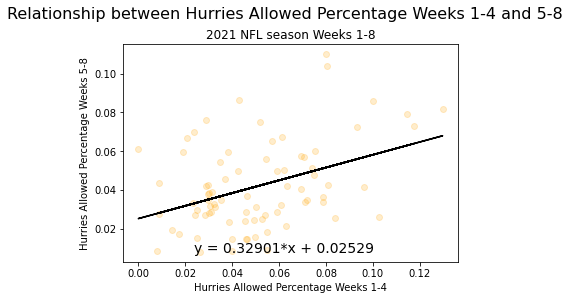

In [4]:
#Dataframe for blockers week 1-4 with over 200 snaps
pbp_week_1_4 = pbp[pbp['week'] < 5]
pbp_week_1_4 = pbp_week_1_4[['gameId','playId']]
ptrack_qb_poss_weeks_1_4 = pd.DataFrame.merge(pbp_week_1_4,ptrack_qb_poss_block, on = ['gameId','playId'], how = 'inner')
ptrack_qb_poss_weeks_1_4['gameplaynflId'] = ptrack_qb_poss_weeks_1_4.gameId.astype(str) + '_' + ptrack_qb_poss_weeks_1_4.playId.astype(str) + '_' + ptrack_qb_poss_weeks_1_4.nflId.astype(str)
ptrack_qb_poss_weeks_1_4 = ptrack_qb_poss_weeks_1_4[ptrack_qb_poss_weeks_1_4['pff_role'] == 'Pass Block']
ptrack_qb_poss_weeks_1_4 = ptrack_qb_poss_weeks_1_4.drop_duplicates(subset=['gameplaynflId'])
value_counts = ptrack_qb_poss_weeks_1_4['nflId'].value_counts()
for i in ptrack_qb_poss_weeks_1_4['nflId'].unique():
    if (value_counts[i] < 100):
        ptrack_qb_poss_weeks_1_4 = ptrack_qb_poss_weeks_1_4[ptrack_qb_poss_weeks_1_4['nflId'] != i]
ptrack_qb_poss_weeks_1_4_pcts = ptrack_qb_poss_weeks_1_4[['nflId','pff_hurryAllowed','pff_sackAllowed','pff_beatenByDefender','pff_hitAllowed']].groupby('nflId').mean()

#Dataframe for blockers week 5-8 with over 200 snaps
pbp_week_5_8 = pbp[(pbp['week'] > 4) & (pbp['week'] < 9)]
pbp_week_1_4 = pbp_week_5_8[['gameId','playId']]
ptrack_qb_poss_weeks_5_8 = pd.DataFrame.merge(pbp_week_5_8,ptrack_qb_poss_block, on = ['gameId','playId'], how = 'inner')
ptrack_qb_poss_weeks_5_8['gameplaynflId'] = ptrack_qb_poss_weeks_5_8.gameId.astype(str) + '_' + ptrack_qb_poss_weeks_5_8.playId.astype(str) + '_' + ptrack_qb_poss_weeks_5_8.nflId.astype(str)
ptrack_qb_poss_weeks_5_8 = ptrack_qb_poss_weeks_5_8[ptrack_qb_poss_weeks_5_8['pff_role'] == 'Pass Block']
ptrack_qb_poss_weeks_5_8 = ptrack_qb_poss_weeks_5_8.drop_duplicates(subset=['gameplaynflId'])
value_counts = ptrack_qb_poss_weeks_5_8['nflId'].value_counts()
for i in ptrack_qb_poss_weeks_5_8['nflId'].unique():
    if (value_counts[i] < 100):
        ptrack_qb_poss_weeks_5_8 = ptrack_qb_poss_weeks_5_8[ptrack_qb_poss_weeks_5_8['nflId'] != i]
ptrack_qb_poss_weeks_5_8_pcts = ptrack_qb_poss_weeks_5_8[['nflId','pff_hurryAllowed','pff_sackAllowed','pff_beatenByDefender','pff_hitAllowed']].groupby('nflId').mean()

#Merge Dataframes
ptrack_qb_poss_weeks_1_4_vs_5_8_pcts = pd.DataFrame.merge(ptrack_qb_poss_weeks_1_4_pcts,ptrack_qb_poss_weeks_5_8_pcts,how='inner',on='nflId')
ptrack_qb_poss_weeks_1_4_vs_5_8_pcts = ptrack_qb_poss_weeks_1_4_vs_5_8_pcts.rename(columns={'pff_hurryAllowed_x':'pff_hurryAllowed_1_4','pff_hurryAllowed_y':'pff_hurryAllowed_5_8','pff_sackAllowed_x':'pff_sackAllowed_1_4','pff_sackAllowed_y':'pff_sackAllowed_5_8','pff_beatenByDefender_x':'pff_beatenByDefender_1_4','pff_beatenByDefender_y':'pff_beatenByDefender_5_8','pff_hitAllowed_x':'pff_hitAllowed_1_4','pff_hitAllowed_y':'pff_hitAllowed_5_8'})

##Plot
#Add Formula To The Plot
fig = plt.figure()
ax = fig.add_subplot()
#change ax.text

#Scatter Plot To Visualize The How Seconds Remianing Impacts FT%
plt.plot(ptrack_qb_poss_weeks_1_4_vs_5_8_pcts['pff_hurryAllowed_1_4'], ptrack_qb_poss_weeks_1_4_vs_5_8_pcts['pff_hurryAllowed_5_8'], 'o', color = 'orange', alpha = 0.2)
#replace range with week 1-4
#replace pbp_freethrow with week 5-8

#Add Linear Regression
x = ptrack_qb_poss_weeks_1_4_vs_5_8_pcts['pff_hurryAllowed_1_4']
m, b = np.polyfit(x, ptrack_qb_poss_weeks_1_4_vs_5_8_pcts['pff_hurryAllowed_5_8'], 1)
plt.plot(x, m*x+b, color='black')

ax.text(0.48, 0.03, 'y = ' + np.around(m,5).astype(str) + '*x + ' + np.around(b,5).astype(str),
       verticalalignment='bottom', horizontalalignment='center',
       transform=ax.transAxes, fontsize=14)

#Add Labels
plt.suptitle('Hurries Allowed Percentage Weeks 1-4 and 5-8', size = 16, y= 1.01)
plt.title('2021 NFL season Weeks 1-8 (Min. 100 Snaps Each Subset)', size = 12)
plt.xlabel('Hurries Allowed Pct Weeks 1-4')
plt.ylabel('Hurries Allowed Pct Weeks 5-8')